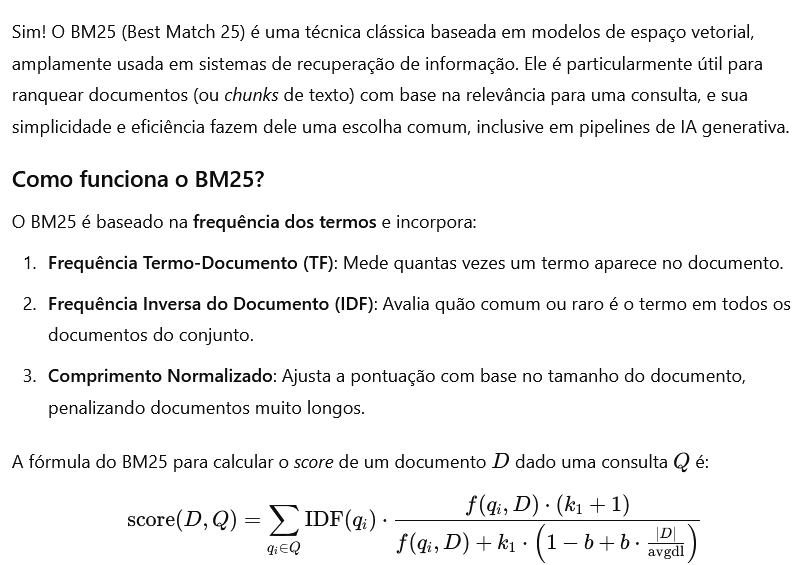

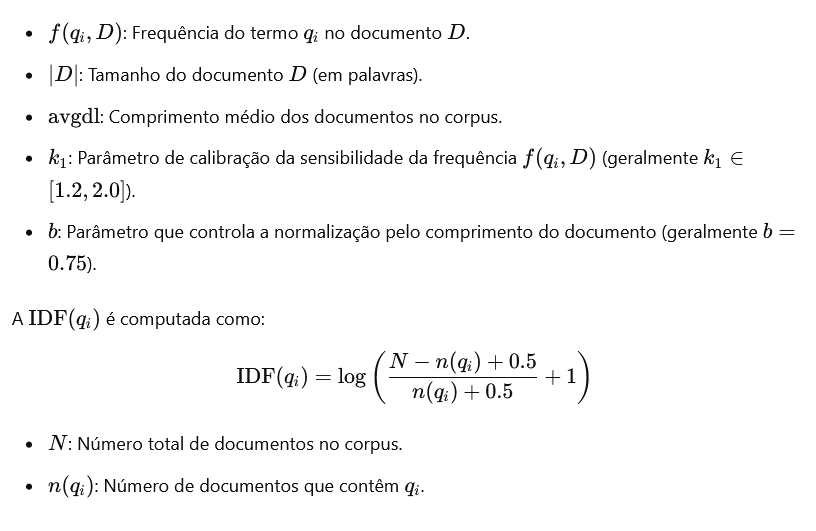

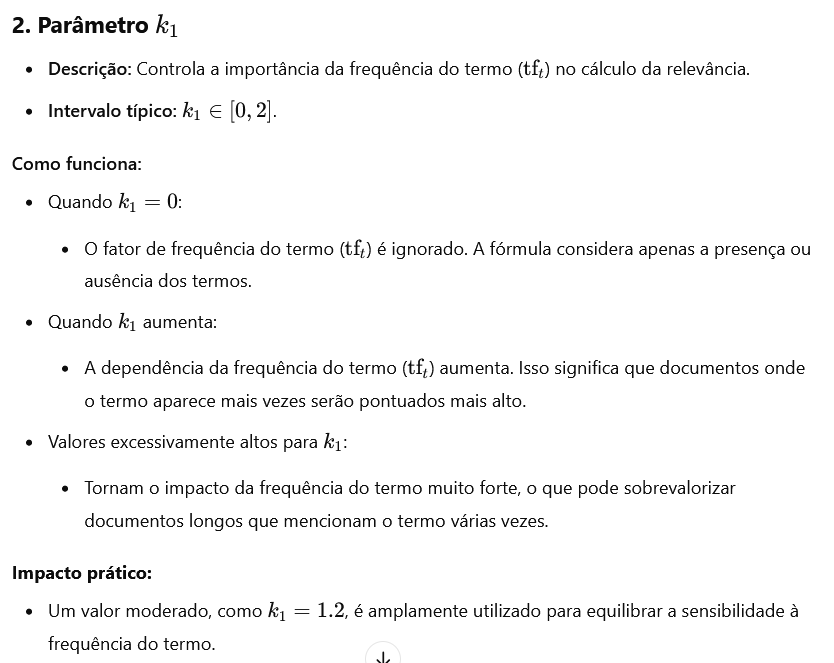

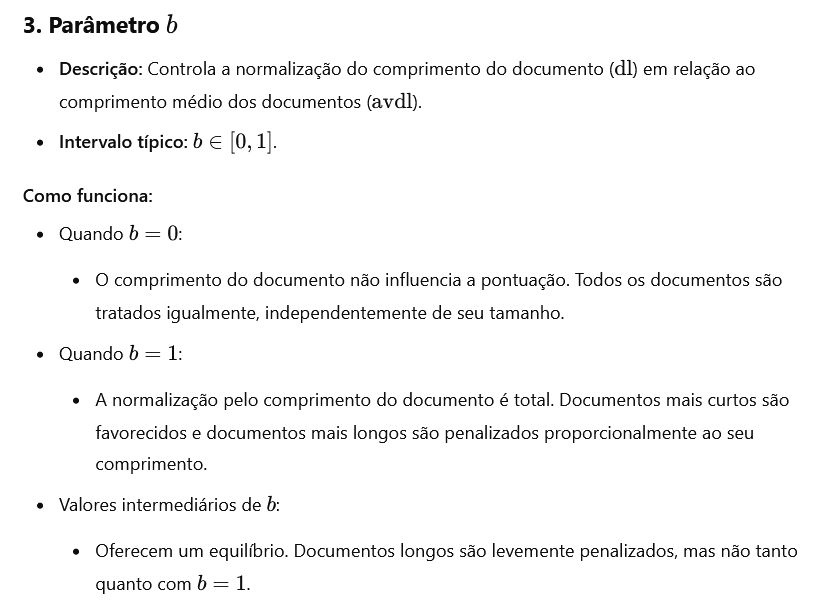

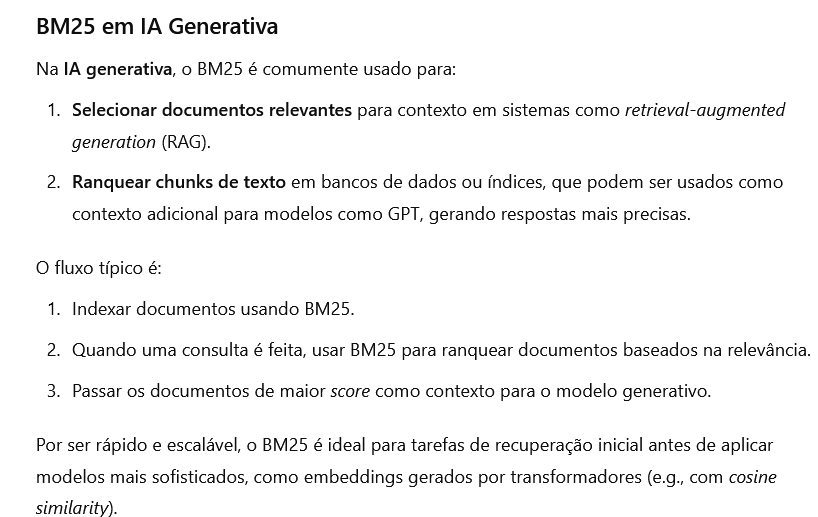

In [4]:
from rank_bm25 import BM25Okapi
from nltk.tokenize import word_tokenize
import nltk

In [5]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
corpus = [
    "O aprendizado de máquina é uma área fascinante da ciência de dados.",
    "A recuperação de informação é útil para IA generativa.",
    "O BM25 é uma técnica popular em mecanismos de busca.",
    "Python é amplamente usado em aprendizado de máquina e ciência de dados.",
    "Mecanismos de busca como o Google são baseados em recuperação de informação."
]

In [16]:
# Pré-processar os documentos: tokenização
tokenized_corpus = [word_tokenize(doc.lower()) for doc in corpus]
print(tokenized_corpus)

[['o', 'aprendizado', 'de', 'máquina', 'é', 'uma', 'área', 'fascinante', 'da', 'ciência', 'de', 'dados', '.'], ['a', 'recuperação', 'de', 'informação', 'é', 'útil', 'para', 'ia', 'generativa', '.'], ['o', 'bm25', 'é', 'uma', 'técnica', 'popular', 'em', 'mecanismos', 'de', 'busca', '.'], ['python', 'é', 'amplamente', 'usado', 'em', 'aprendizado', 'de', 'máquina', 'e', 'ciência', 'de', 'dados', '.'], ['mecanismos', 'de', 'busca', 'como', 'o', 'google', 'são', 'baseados', 'em', 'recuperação', 'de', 'informação', '.']]


In [11]:
# Criar o modelo BM25
#bm25 = BM25Okapi(tokenized_corpus)
bm25 = BM25Okapi(tokenized_corpus, k1=1.5, b=0.75)

In [12]:
# Consulta de exemplo
query = "ciência de dados e aprendizado"
tokenized_query = word_tokenize(query.lower())
print(tokenized_query)


['ciência', 'de', 'dados', 'e', 'aprendizado']


In [17]:
# Recuperar scores para os documentos
scores = bm25.get_scores(tokenized_query)
print(scores)

# Ordenar os documentos pela relevância
ranked_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)
print(ranked_indices)

[1.15564098 0.14196999 0.1364387  2.21454439 0.18270921]
[3, 0, 4, 1, 2]


In [18]:
# Exibir os resultados
print("Consulta:", query)
print("\nResultados ranqueados:")
for idx in ranked_indices:
    print(f"Documento {idx + 1} (Score: {scores[idx]:.2f}): {corpus[idx]}")

Consulta: ciência de dados e aprendizado

Resultados ranqueados:
Documento 4 (Score: 2.21): Python é amplamente usado em aprendizado de máquina e ciência de dados.
Documento 1 (Score: 1.16): O aprendizado de máquina é uma área fascinante da ciência de dados.
Documento 5 (Score: 0.18): Mecanismos de busca como o Google são baseados em recuperação de informação.
Documento 2 (Score: 0.14): A recuperação de informação é útil para IA generativa.
Documento 3 (Score: 0.14): O BM25 é uma técnica popular em mecanismos de busca.


## Tokenização do BM25 com X caracteres

In [22]:
def tokenize_ngram(text, n=3):
    """
    Tokeniza um texto em n-gramas de caracteres.
    Parâmetros:
        text (str): texto de entrada
        n (int): tamanho do n-grama (ex: 3 para trigramas)
    Retorna:
        list[str]: lista de n-gramas
    """
    text = text.lower()
    text = ''.join(c for c in text if c.isalnum() or c.isspace())
    return [text[i:i+n] for i in range(len(text) - n + 1)] if len(text) >= n else [text]

# Aplicação no corpus
tokenized_corpus = [tokenize_ngram(doc, n=3) for doc in corpus]

print(tokenized_corpus)


[['o a', ' ap', 'apr', 'pre', 'ren', 'end', 'ndi', 'diz', 'iza', 'zad', 'ado', 'do ', 'o d', ' de', 'de ', 'e m', ' má', 'máq', 'áqu', 'qui', 'uin', 'ina', 'na ', 'a é', ' é ', 'é u', ' um', 'uma', 'ma ', 'a á', ' ár', 'áre', 'rea', 'ea ', 'a f', ' fa', 'fas', 'asc', 'sci', 'cin', 'ina', 'nan', 'ant', 'nte', 'te ', 'e d', ' da', 'da ', 'a c', ' ci', 'ciê', 'iên', 'ênc', 'nci', 'cia', 'ia ', 'a d', ' de', 'de ', 'e d', ' da', 'dad', 'ado', 'dos'], ['a r', ' re', 'rec', 'ecu', 'cup', 'upe', 'per', 'era', 'raç', 'açã', 'ção', 'ão ', 'o d', ' de', 'de ', 'e i', ' in', 'inf', 'nfo', 'for', 'orm', 'rma', 'maç', 'açã', 'ção', 'ão ', 'o é', ' é ', 'é ú', ' út', 'úti', 'til', 'il ', 'l p', ' pa', 'par', 'ara', 'ra ', 'a i', ' ia', 'ia ', 'a g', ' ge', 'gen', 'ene', 'ner', 'era', 'rat', 'ati', 'tiv', 'iva'], ['o b', ' bm', 'bm2', 'm25', '25 ', '5 é', ' é ', 'é u', ' um', 'uma', 'ma ', 'a t', ' té', 'téc', 'écn', 'cni', 'nic', 'ica', 'ca ', 'a p', ' po', 'pop', 'opu', 'pul', 'ula', 'lar', 'ar ', 

In [23]:
bm25 = BM25Okapi(tokenized_corpus, k1=1.5, b=0.75)

In [24]:
# Consulta de exemplo
query = "ciência de dados e aprendizado"
tokenized_query = tokenize_ngram(query.lower(), n=3)
print(tokenized_query)


['ciê', 'iên', 'ênc', 'nci', 'cia', 'ia ', 'a d', ' de', 'de ', 'e d', ' da', 'dad', 'ado', 'dos', 'os ', 's e', ' e ', 'e a', ' ap', 'apr', 'pre', 'ren', 'end', 'ndi', 'diz', 'iza', 'zad', 'ado']


In [25]:
# Recuperar scores para os documentos
scores = bm25.get_scores(tokenized_query)
print(scores)

# Ordenar os documentos pela relevância
ranked_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)
print(ranked_indices)

[7.56694646 0.57822281 0.76087288 8.21368085 2.43309709]
[3, 0, 4, 2, 1]


In [26]:
# Exibir os resultados
print("Consulta:", query)
print("\nResultados ranqueados:")
for idx in ranked_indices:
    print(f"Documento {idx + 1} (Score: {scores[idx]:.2f}): {corpus[idx]}")

Consulta: ciência de dados e aprendizado

Resultados ranqueados:
Documento 4 (Score: 8.21): Python é amplamente usado em aprendizado de máquina e ciência de dados.
Documento 1 (Score: 7.57): O aprendizado de máquina é uma área fascinante da ciência de dados.
Documento 5 (Score: 2.43): Mecanismos de busca como o Google são baseados em recuperação de informação.
Documento 3 (Score: 0.76): O BM25 é uma técnica popular em mecanismos de busca.
Documento 2 (Score: 0.58): A recuperação de informação é útil para IA generativa.


## Ideias de BM25 com outras técnicas

In [7]:
from rank_bm25 import BM25Okapi
from rapidfuzz import process